<a href="https://colab.research.google.com/github/elmedianikhadija/PFE-WITH-SIR/blob/main/sir%20partie%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
plt.style.use('seaborn-poster')

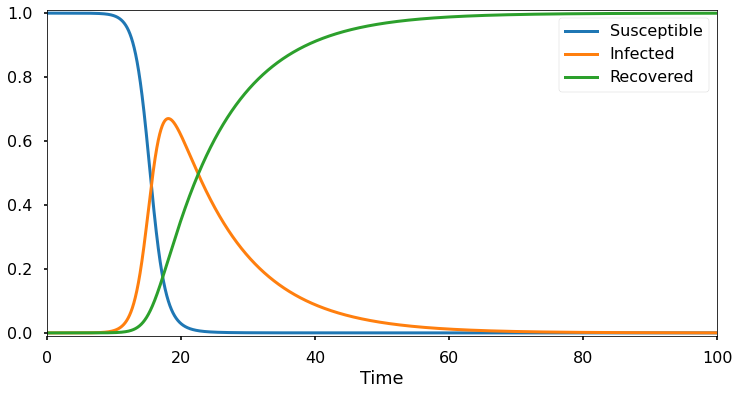

In [7]:
beta = 1.0
gamma = 0.1
N = 1.

# Initial values

R = [0]
I = [1.e-6]
S = [N - I[0] - R[0]]

def change(S,I,R):
    S_change = -beta*I*S/N
    I_change = beta*I*S/N - gamma*I
    R_change = gamma*I
    return S_change, I_change, R_change


T = 100
dt = 0.01
times = np.linspace(0,T,int(T/dt)+1)

for t in times[1:]:
    # Just use Euler's method for this introductory example
    S_change, I_change, R_change = change(S[-1],I[-1],R[-1])
    I.append(I[-1]+dt*I_change)
    S.append(S[-1]+dt*S_change)
    R.append(R[-1]+dt*R_change)

plt.figure(figsize=(12,6))
plt.plot(times,S,lw=3);
plt.plot(times,I,lw=3);
plt.plot(times,R,lw=3);
plt.legend(['Susceptible','Infected','Recovered'])
plt.xlabel('Time');
plt.xlim(0,100); plt.ylim(-.01,1.01);

Ici j’ai mis N=1 les nombres sur l’axe vertical représentent donc une fraction de la population actuelle. Initialement, seule une infime fraction est infectée tandis que le reste est sensible. Le graphique ci-dessus montre le comportement typique d’une épidémie: une propagation exponentielle rapide initiale, jusqu’à ce qu’une grande partie de la population soit infectée ou rétablie, moment auquel le nombre d’infections commence à diminuer.

Selon notre analyse ci-dessus, le nombre d’infections devrait commencer à diminuer lorsque la fraction sensible S/N est égal à γ/β. Ici j’ai pris β=1 et γ=1/10, de sorte que le pic d’infection devrait se produire lorsque la population sensible est tombée à 1/10. Vérifions:

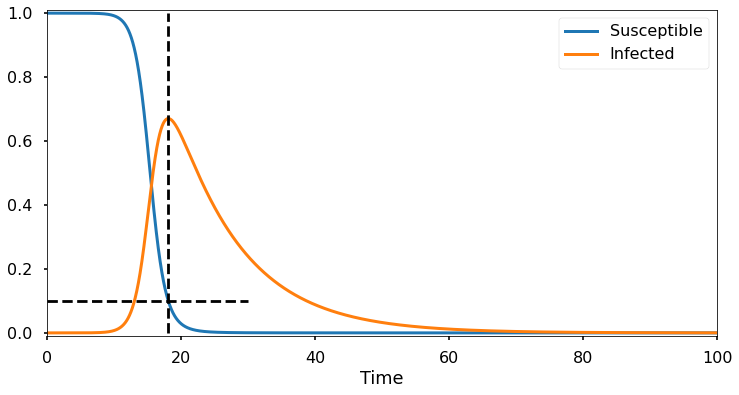

In [8]:
plt.figure(figsize=(12,6))
plt.plot(times,S,lw=3);
plt.plot(times,I,lw=3);
plt.legend(['Susceptible','Infected'])
plt.xlabel('Time');
plt.plot([18.,18.],[0,1],'--k')
plt.plot([0,30],[0.1,0.1],'--k');
plt.xlim(0,100);
plt.ylim(-.01,1.01);

In [9]:
def SIR_model(beta=1.0,gamma=0.1):

    R = [0]
    I = [1.e-6]
    S = [N - I[0] - R[0]]

    def change(S,I,R):
        S_change = -beta*I*S/N
        I_change = beta*I*S/N - gamma*I
        R_change = gamma*I
        return S_change, I_change, R_change


    T = 100
    dt = 0.01
    times = np.linspace(0,T,int(T/dt)+1)

    for t in times[1:]:
        S_change, I_change, R_change = change(S[-1],I[-1],R[-1])
        I.append(I[-1]+dt*I_change)
        S.append(S[-1]+dt*S_change)
        R.append(R[-1]+dt*R_change)

    plt.figure(figsize=(12,6))
    plt.plot(times,S,lw=3);
    plt.plot(times,I,lw=3);
    plt.plot(times,R,lw=3);
    plt.legend(['Susceptible','Infected','Recovered'])
    plt.xlabel('Time');
    plt.xlim(0,100); plt.ylim(-.01,1.01);

In [10]:
interact(SIR_model,beta=widgets.FloatSlider(min=0.01,max=1.0,step=0.01,value=1.0,description=r'$\beta$'),
         gamma=widgets.FloatSlider(min=0.01,max=1.0,step=0.01,value=0.1,description=r'$\gamma$'));

interactive(children=(FloatSlider(value=1.0, description='$\\beta$', max=1.0, min=0.01, step=0.01), FloatSlide…